<a href="https://colab.research.google.com/github/Rushi589/Deep_learning/blob/main/depression_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**Data understanding**

In [ ]:
df=pd.read_csv("/content/student_depression_dataset.csv")

In [ ]:
df.shape

(27901, 18)

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.drop(columns=["id"],inplace=True)

In [ ]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr(numeric_only=True)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
Age,1.000000,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.032928,-0.226422
Academic Pressure,-0.075803,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,0.095970,0.474835
Work Pressure,0.002015,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.005468,-0.003351
CGPA,0.005056,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,0.002604,0.022210
Study Satisfaction,0.009235,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,-0.036441,-0.167971
Job Satisfaction,-0.000432,-0.024945,0.770652,-0.053631,-0.021907,1.000000,-0.005222,-0.003482
Work/Study Hours,-0.032928,0.095970,-0.005468,0.002604,-0.036441,-0.005222,1.000000,0.208563
Depression,-0.226422,0.474835,-0.003351,0.022210,-0.167971,-0.003482,0.208563,1.000000


In [ ]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(df[i].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
Ci

In [ ]:
df["City"] = np.where((df['City'].value_counts()[df['City']]) < 3, 'other_city', df['City'])

In [ ]:
df['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [ ]:
pd.crosstab(df['Gender'],df['Depression'])

Depression,0,1
Gender,,
Female,5133,7221
Male,6432,9115


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(pd.crosstab(df[i],df['Depression']))

Depression     0     1
Gender                
Female      5133  7221
Male        6432  9115
Depression       0    1
City                   
Agra           509  585
Ahmedabad      311  640
Bangalore      300  467
Bhopal         355  579
Chennai        357  528
Delhi          300  468
Faridabad      190  271
Ghaziabad      317  428
Hyderabad      443  897
Indore         254  389
Jaipur         493  543
Kalyan         636  934
Kanpur         279  330
Kolkata        417  649
Lucknow        514  641
Ludhiana       464  647
Meerut         332  493
Mumbai         313  386
Nagpur         288  363
Nashik         258  289
Patna          371  636
Pune           427  541
Rajkot         305  511
Srinagar       609  763
Surat          453  625
Thane          466  673
Vadodara       304  390
Varanasi       321  364
Vasai-Virar    551  739
Visakhapatnam  417  552
other_city      11   15
Depression                    0      1
Profession                            
'Civil Engineer'              0      1

In [ ]:
df['Financial Stress'].unique()


array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

**EDA**

**Univariate**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

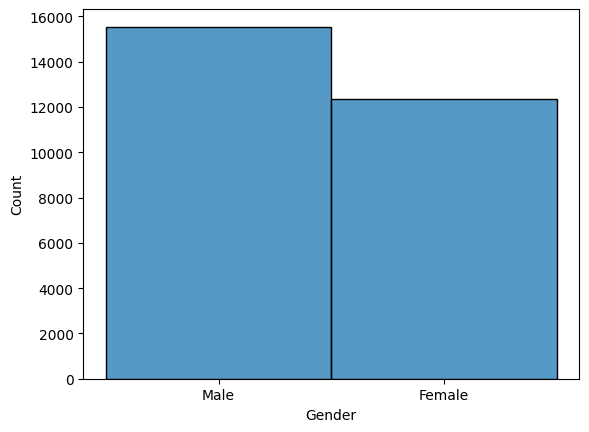

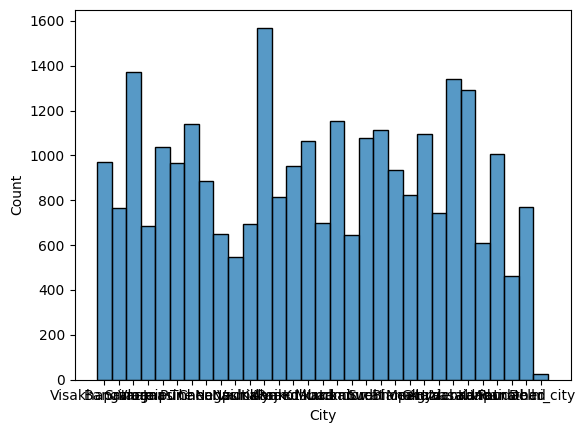

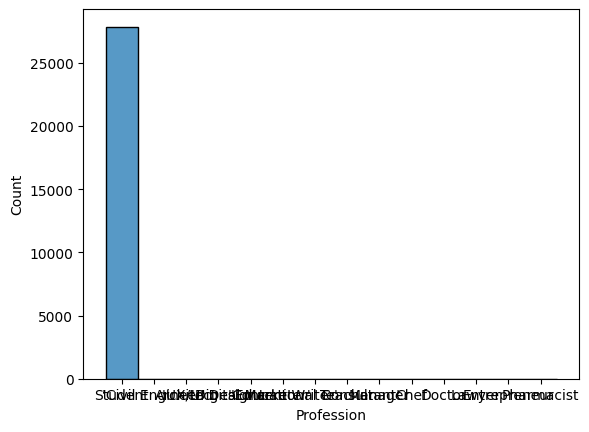

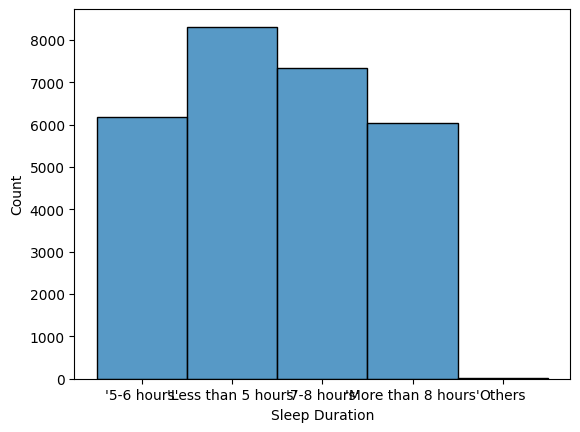

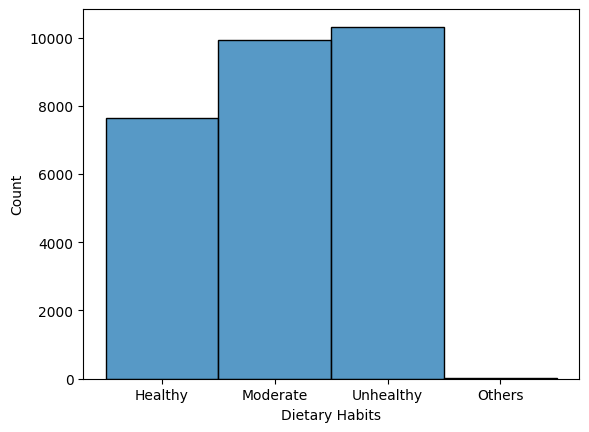

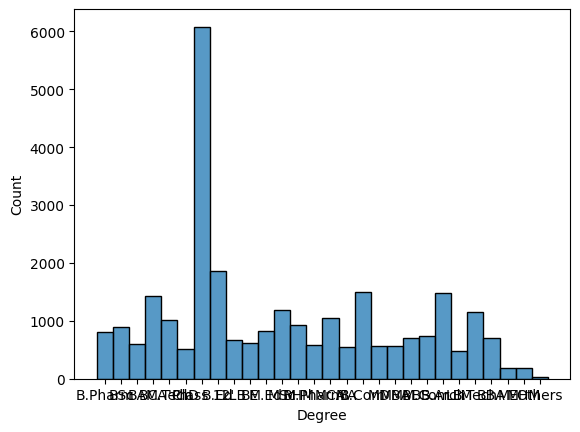

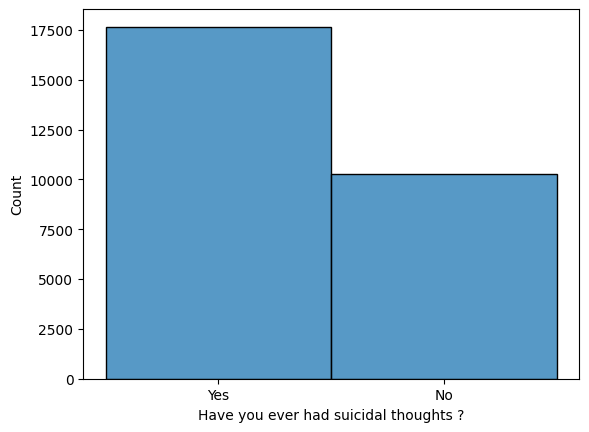

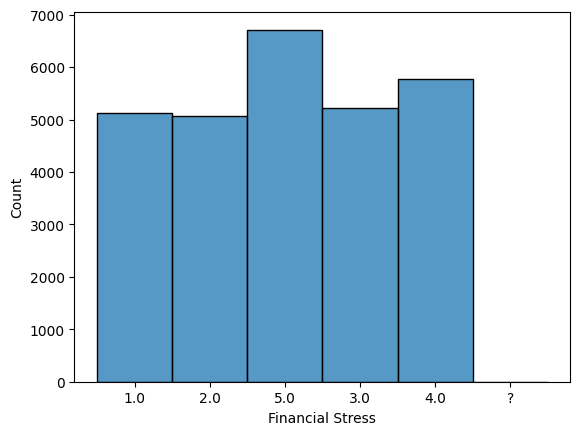

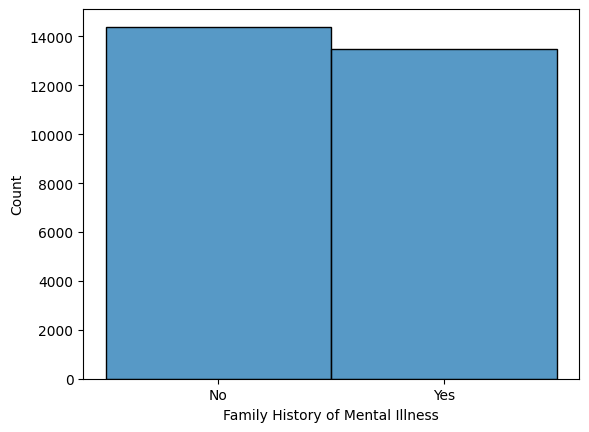

In [ ]:
for i in df.columns[df.dtypes=='object']:
  plt.figure()
  sns.histplot(df[i])
  plt.show()

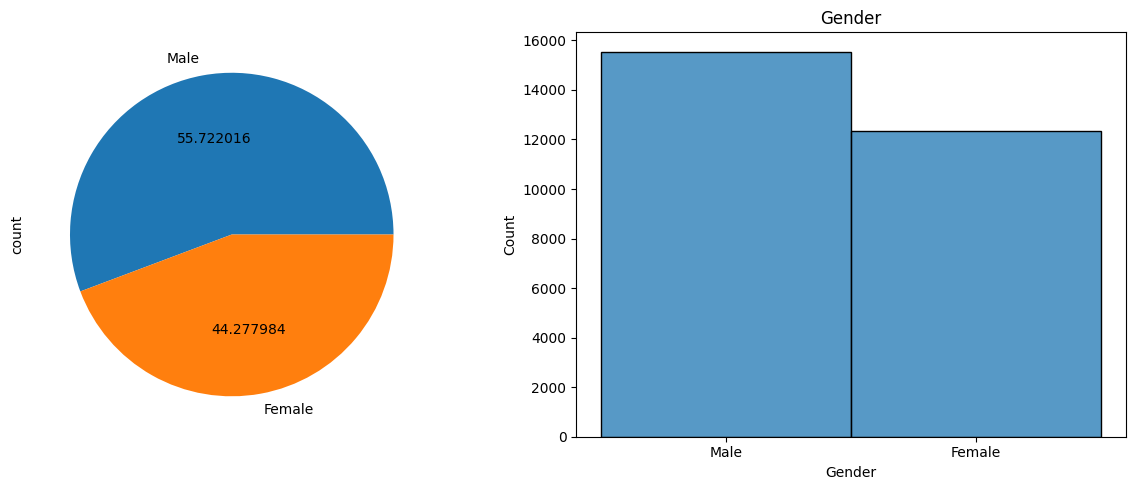

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Gender'].value_counts().plot(kind='pie',autopct='%2f',ax=axes[0])
sns.histplot(df['Gender'],ax=axes[1])
plt.title(label="Gender")
plt.tight_layout()
plt.show()

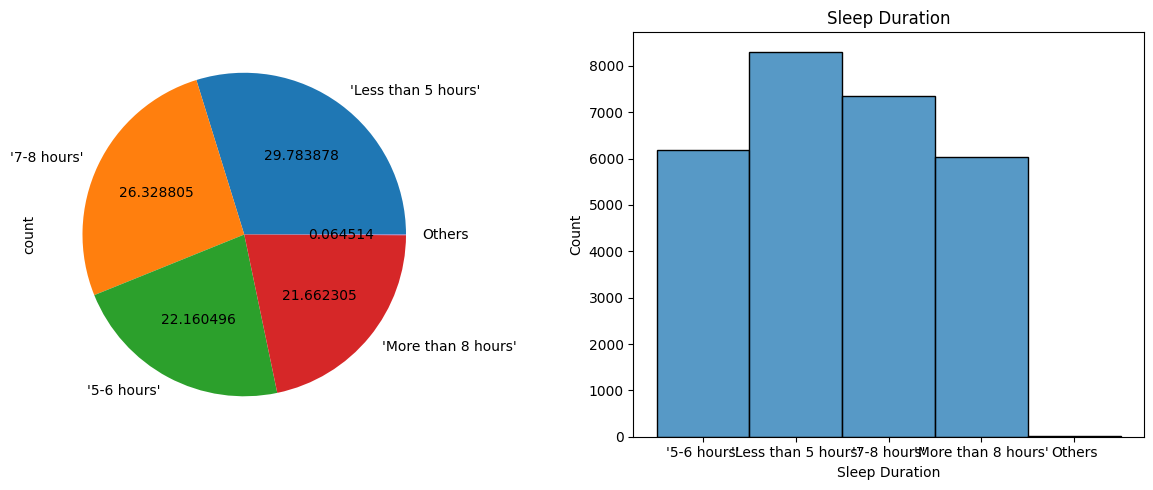

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Sleep Duration'].value_counts().plot(kind='pie',autopct='%2f',ax=axes[0])
sns.histplot(df['Sleep Duration'],ax=axes[1])
plt.title(label="Sleep Duration")
plt.tight_layout()
plt.show()

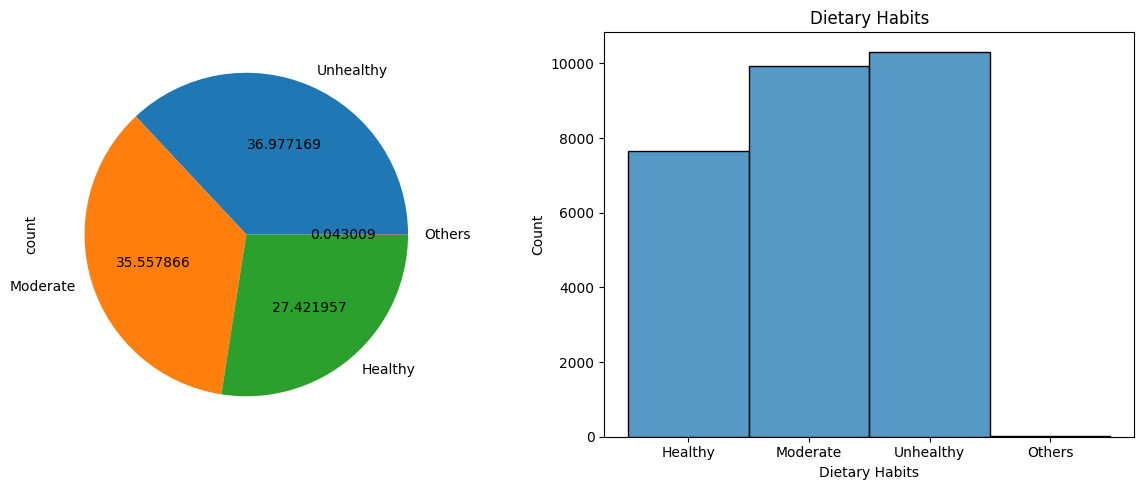

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Dietary Habits'].value_counts().plot(kind='pie',autopct='%2f',ax=axes[0])
sns.histplot(df['Dietary Habits'],ax=axes[1])
plt.title(label="Dietary Habits")
plt.tight_layout()
plt.show()

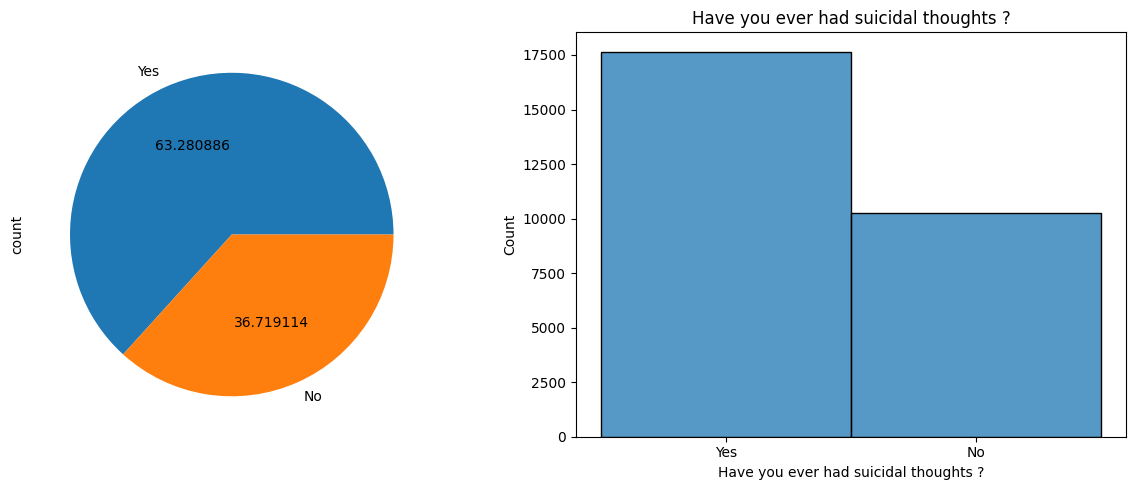

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='pie',autopct='%2f',ax=axes[0])
sns.histplot(df['Have you ever had suicidal thoughts ?'],ax=axes[1])
plt.title(label="Have you ever had suicidal thoughts ?")
plt.tight_layout()
plt.show()

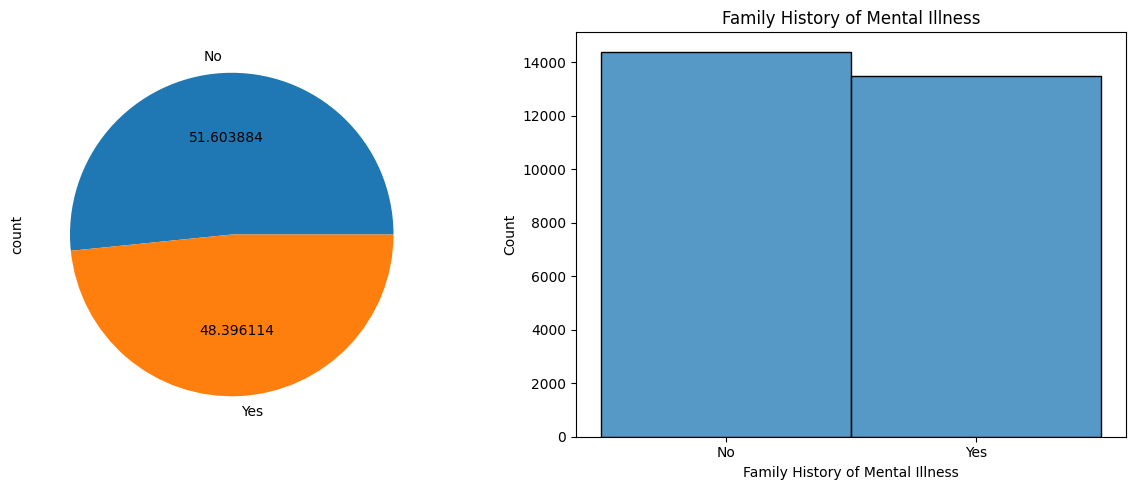

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Family History of Mental Illness'].value_counts().plot(kind='pie',autopct='%2f',ax=axes[0])
sns.histplot(df['Family History of Mental Illness'],ax=axes[1])
plt.title(label="Family History of Mental Illness")
plt.tight_layout()
plt.show()

In [ ]:
for i in df.columns[df.dtypes!="object"]:
  print(i,df[i].skew())

Age 0.13223892889539463
Academic Pressure -0.13516457647806857
Work Pressure 108.59436053312221
CGPA -0.11306325679931707
Study Satisfaction 0.010422782999912422
Job Satisfaction 74.1056632851556
Work/Study Hours -0.4547687999296842
Depression -0.3471259528935685


<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


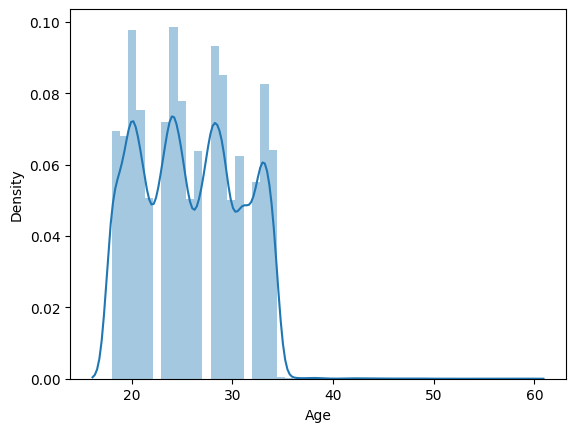

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


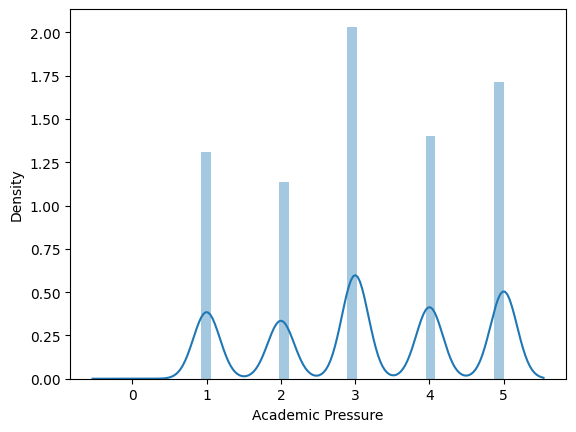

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


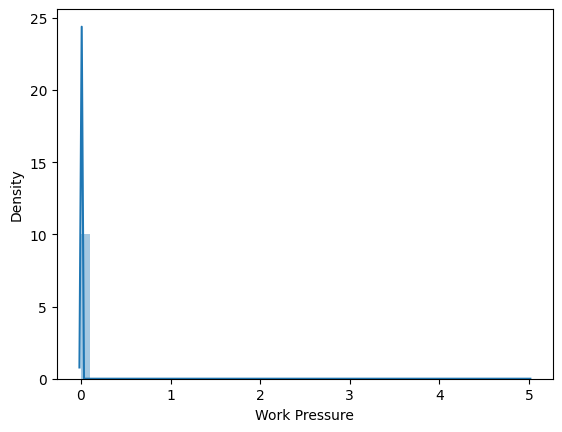

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


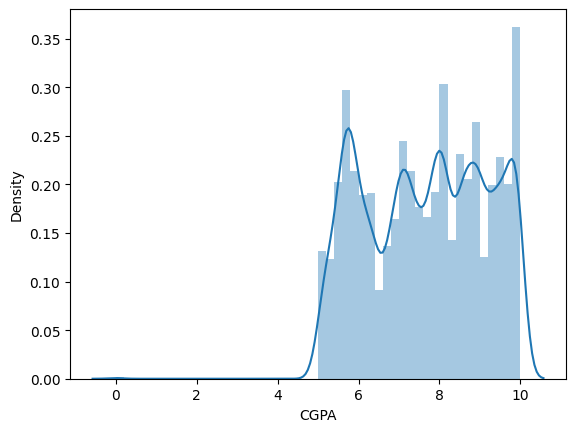

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


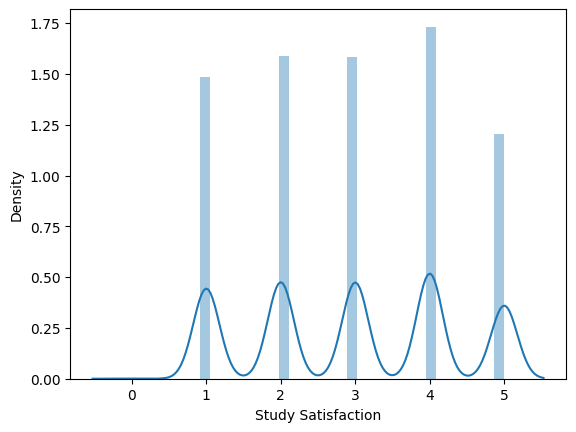

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


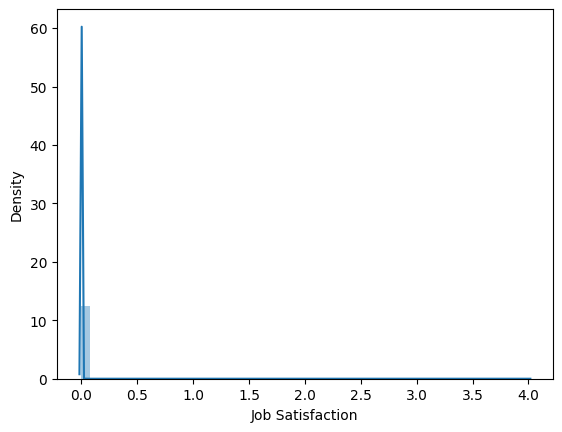

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


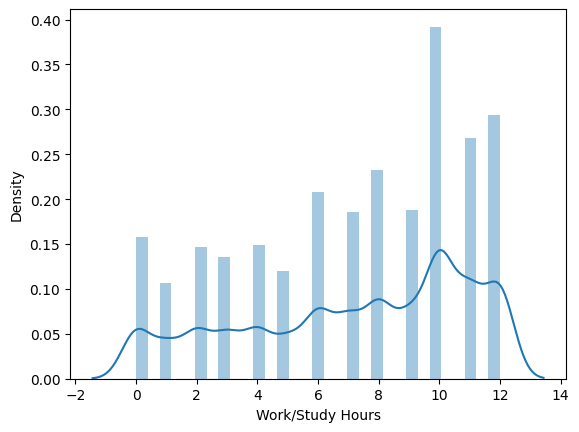

<ipython-input-376-11add5059af4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


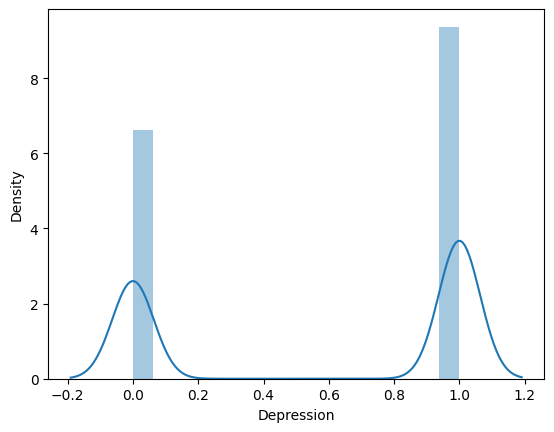

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.distplot(df[i])
  plt.show()

**Bivariate/Multivariate**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

<Axes: xlabel='Age', ylabel='CGPA'>

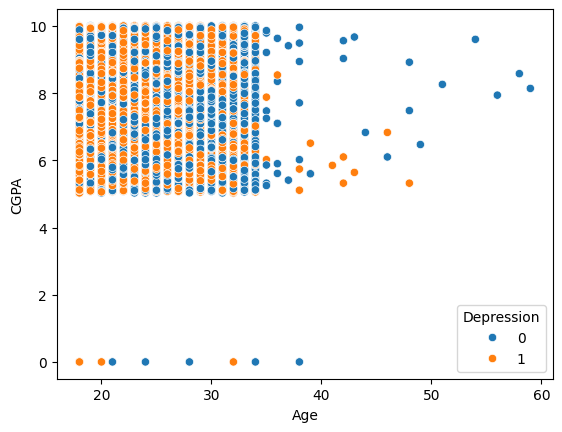

In [ ]:
sns.scatterplot(data=df, x=df['Age'], y=df['CGPA'], hue='Depression')

<Axes: xlabel='Gender', ylabel='Work/Study Hours'>

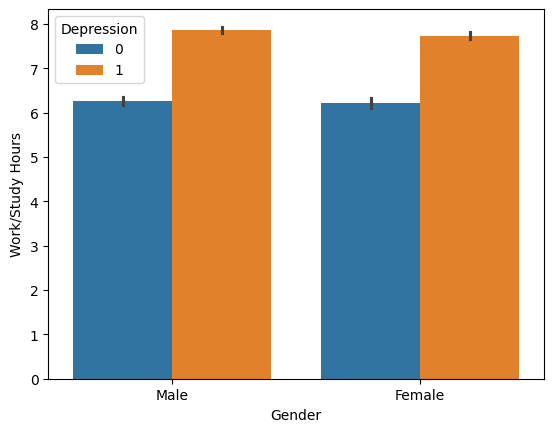

In [ ]:
sns.barplot(data=df,x=df['Gender'],y=df['Work/Study Hours'],hue='Depression')

<Axes: xlabel='Dietary Habits', ylabel='Gender'>

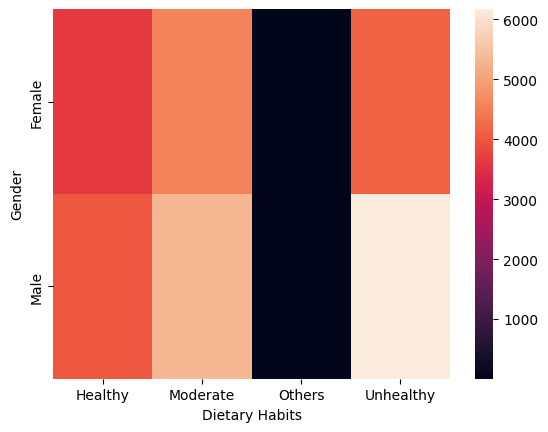

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'],df['Dietary Habits']))

<Axes: xlabel='Depression', ylabel='Gender'>

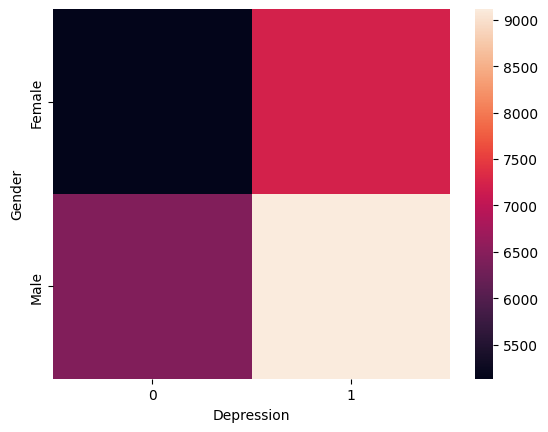

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'],df['Depression']))

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='Gender'>

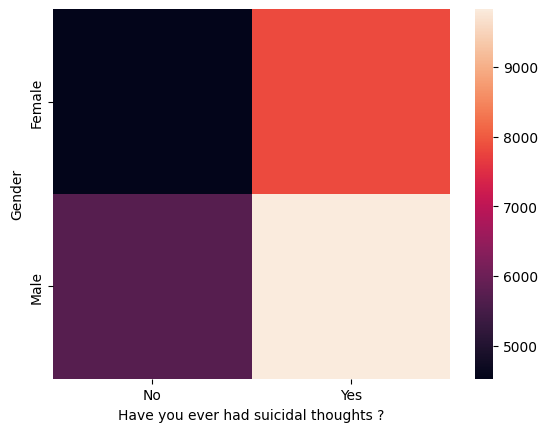

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'],df['Have you ever had suicidal thoughts ?']))

**Outliers Detection and Removal**

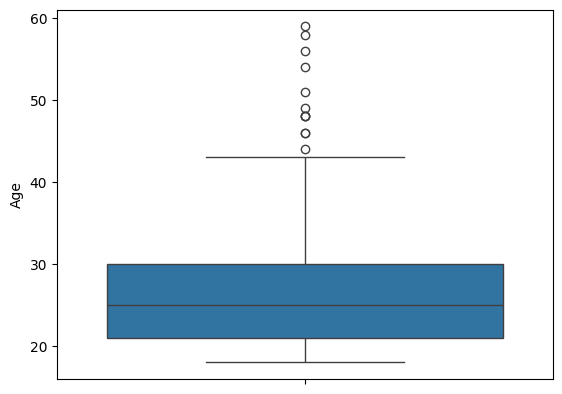

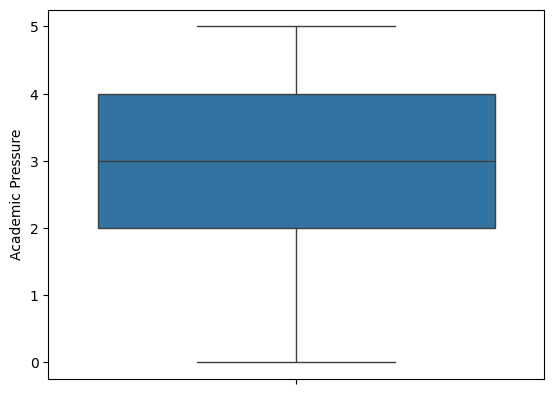

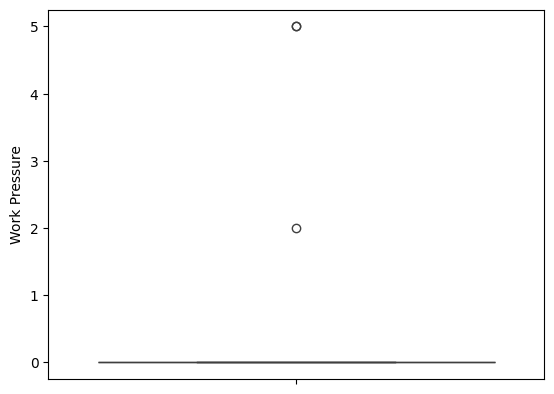

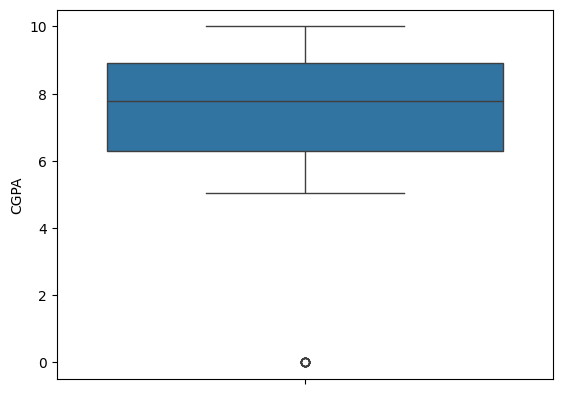

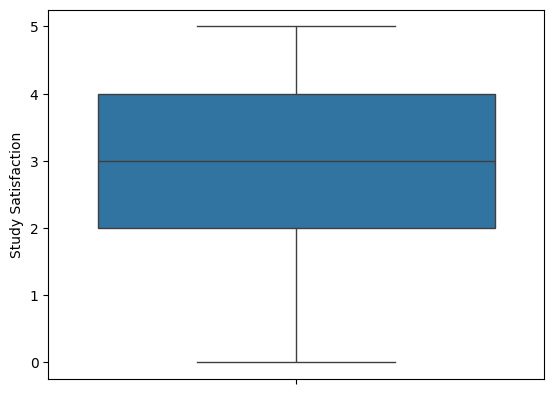

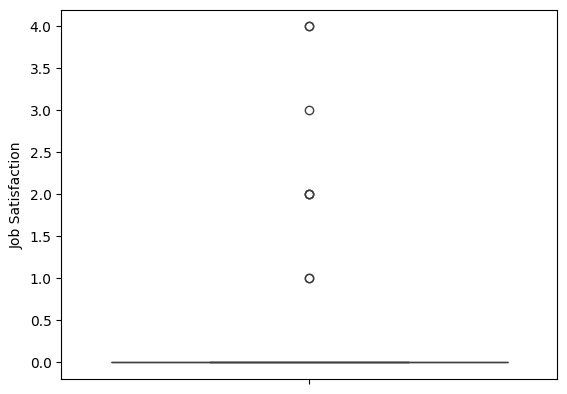

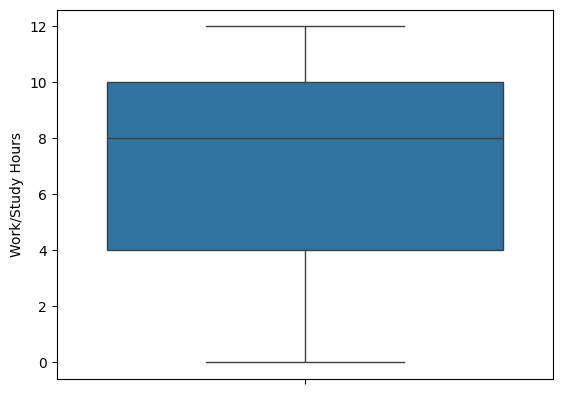

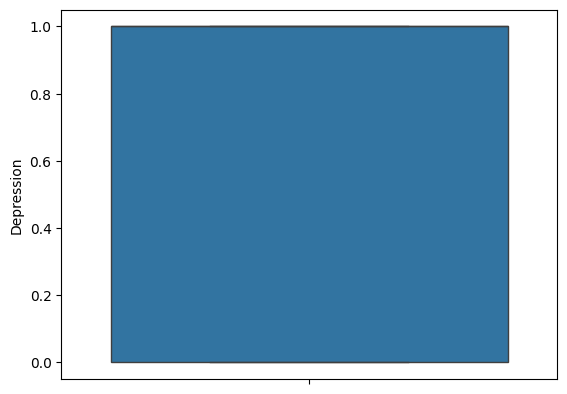

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
for i in df.columns[df.dtypes!='object']:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr
  upper_percent=((df[i]>upper_limit).sum()/df.shape[0])*100
  lower_percent=((df[i]<lower_limit).sum()/df.shape[0])*100

  print(i,upper_percent,lower_percent)


Age 0.04300921113938568 0.0
Academic Pressure 0.0 0.0
Work Pressure 0.01075230278484642 0.0
CGPA 0.0 0.03225690835453927
Study Satisfaction 0.0 0.0
Job Satisfaction 0.02867280742625712 0.0
Work/Study Hours 0.0 0.0
Depression 0.0 0.0


**capping**

**Age col,Work Pressure col,cgpa col,job satisfaction col**  

In [ ]:
percent25_age=df['Age'].quantile(0.25)
percent75_age=df['Age'].quantile(0.75)
iqr=percent75_age-percent25_age
upper_limit_age=percent75_age+1.5*iqr
lower_limit_age=percent25_age-1.5*iqr

In [ ]:
df['Age']=np.where(df['Age']>upper_limit_age,upper_limit_age,
                   np.where(df['Age']<lower_limit_age,lower_limit_age,df['Age']))

In [ ]:
percent25_Work_pre=df['Work Pressure'].quantile(0.25)
percent75_worko_pre=df['Work Pressure'].quantile(0.75)
iqr=percent75_worko_pre-percent25_Work_pre
upper_limit_work_pre=percent75_worko_pre+1.5*iqr
lower_limit_work_pre=percent25_Work_pre-1.5*iqr


In [ ]:
df['Work Pressure']=np.where(df['Work Pressure']>upper_limit_work_pre,upper_limit_work_pre,
                             np.where(df['Work Pressure']<percent25_Work_pre,percent25_Work_pre,df['Work Pressure']))

In [ ]:
percent25_cgpa=df['CGPA'].quantile(0.25)
percent75_cgpa=df['CGPA'].quantile(0.75)
iqr=percent75_cgpa-percent25_cgpa
upper_limit_cgpa=percent75_cgpa+1.5*iqr
lower_limit_cgpa=percent25_cgpa-1.5*iqr

In [ ]:
df['CGPA']=np.where(df['CGPA']>upper_limit_cgpa,upper_limit_cgpa,
                   np.where(df['CGPA']<lower_limit_cgpa,lower_limit_cgpa,df['CGPA']))

In [ ]:
percent25_js=df['Job Satisfaction'].quantile(0.25)
percent75_js=df['Job Satisfaction'].quantile(0.75)
iqr=percent75_js-percent25_js
upper_limit_js=percent75_js+1.5*iqr
lower_limit_js=percent25_js-1.5*iqr

In [ ]:
df['Job Satisfaction']=np.where(df['Job Satisfaction']>upper_limit_js,upper_limit_js,
                   np.where(df['Job Satisfaction']<lower_limit_js,lower_limit_js,df['Job Satisfaction']))

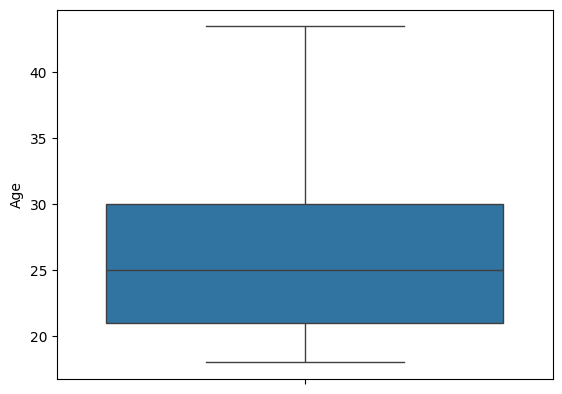

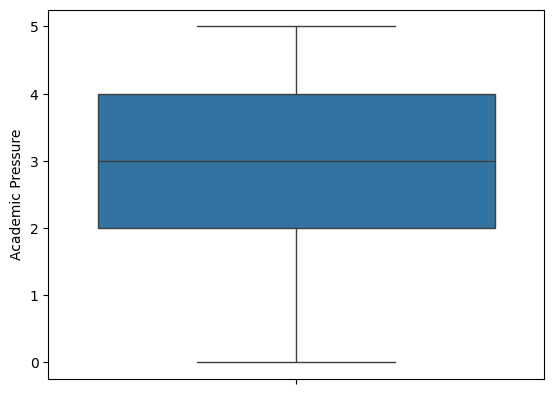

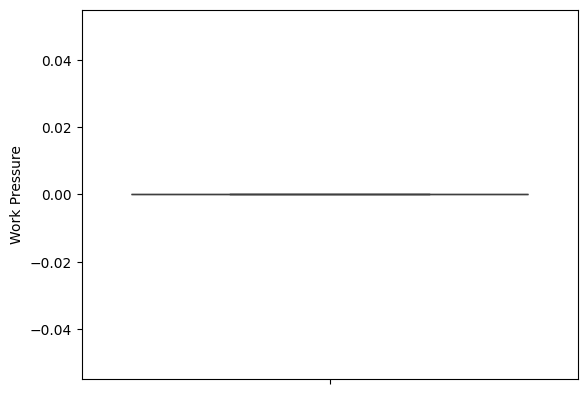

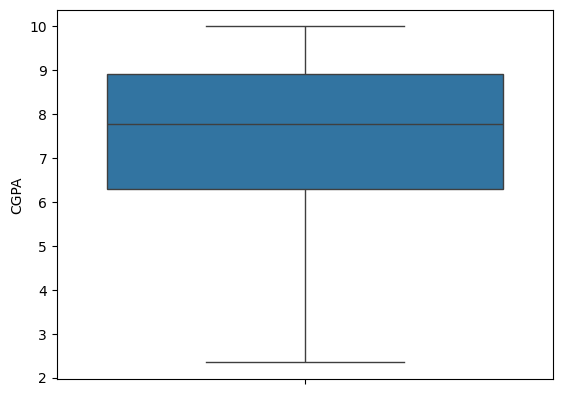

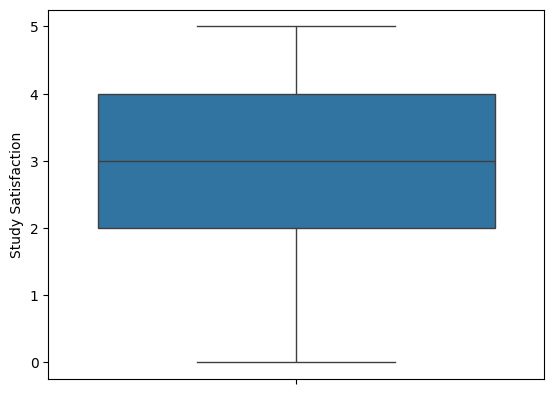

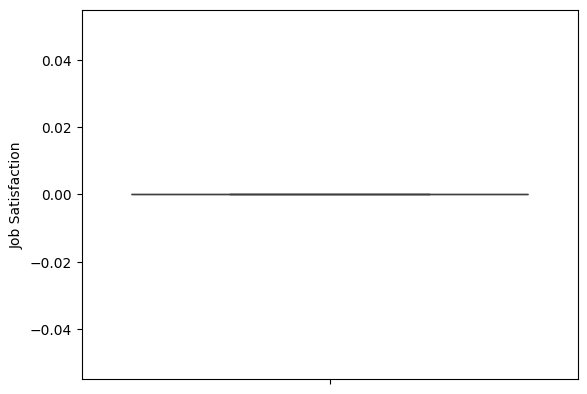

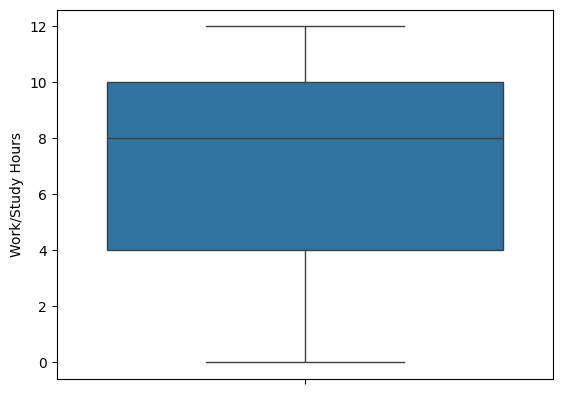

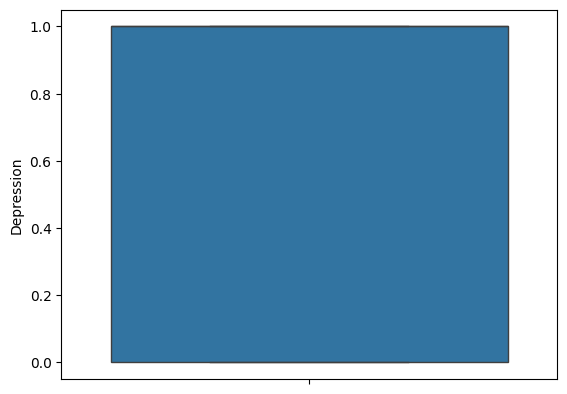

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

**Train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:-1]
y=df['Depression']

In [ ]:
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No


In [ ]:
y

,Depression
0,1
1,0
2,0
3,1
4,0
...,...
27896,0
27897,0
27898,0
27899,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
13048,Male,28.0,Varanasi,Student,2.0,0.0,8.29,5.0,0.0,'5-6 hours',Moderate,MBA,No,4.0,1.0,Yes
24535,Female,33.0,Patna,Student,4.0,0.0,9.05,4.0,0.0,'Less than 5 hours',Healthy,M.Com,No,12.0,4.0,Yes
15303,Female,33.0,Jaipur,Student,4.0,0.0,8.08,4.0,0.0,'Less than 5 hours',Healthy,MA,Yes,12.0,3.0,No
22444,Female,29.0,Kanpur,Student,2.0,0.0,5.76,4.0,0.0,'5-6 hours',Moderate,M.Ed,No,10.0,2.0,Yes
18744,Female,20.0,Surat,Student,5.0,0.0,5.77,5.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,11.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Female,34.0,Ahmedabad,Student,2.0,0.0,7.79,4.0,0.0,'5-6 hours',Unhealthy,B.Arch,No,10.0,1.0,Yes
5390,Male,20.0,Mumbai,Student,3.0,0.0,5.82,1.0,0.0,'More than 8 hours',Moderate,'Class 12',No,3.0,4.0,No
860,Male,18.0,Kolkata,Student,5.0,0.0,6.37,3.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,6.0,5.0,Yes
15795,Female,18.0,Chennai,Student,3.0,0.0,7.21,4.0,0.0,'More than 8 hours',Unhealthy,'Class 12',Yes,0.0,3.0,Yes


In [ ]:
y_train

,Depression
13048,0
24535,0
15303,1
22444,0
18744,1
...,...
21575,1
5390,0
860,1
15795,0


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22320, 16), (5581, 16), (22320,), (5581,))

**Encoding**

In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,len(df[i].unique()))

Gender 2
City 31
Profession 14
Sleep Duration 5
Dietary Habits 4
Degree 28
Have you ever had suicidal thoughts ? 2
Financial Stress 6
Family History of Mental Illness 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [ ]:
#ohe=Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
#te=City,Profession,Degree

**ohe**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,TargetEncoder

In [ ]:
ohe=OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
te=TargetEncoder()

In [ ]:
ohe_encode=['Gender','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness']
te_encode=['City','Profession','Degree']

In [ ]:
train_ohe=ohe.fit_transform(X_train[ohe_encode])
test_ohe=ohe.transform(X_test[ohe_encode])

In [ ]:
feature_names = ohe.get_feature_names_out(ohe_encode)

In [ ]:
train_ohe_concat=pd.DataFrame(train_ohe,columns=feature_names)
test_ohe_concat=pd.DataFrame(test_ohe,columns=feature_names)

In [ ]:
X_train.drop(columns=ohe_encode,inplace=True)
X_test.drop(columns=ohe_encode,inplace=True)

**target encode**

In [ ]:
train_te=te.fit_transform(X_train[['City','Profession','Degree']],y_train)
test_te=te.transform(X_test[["City","Profession","Degree"]])

In [ ]:
train_te_concat=pd.DataFrame(train_te,columns=te.get_feature_names_out(['City','Profession','Degree']))
test_te_concat=pd.DataFrame(test_te,columns=te.get_feature_names_out(['City','Profession','Degree']))

In [ ]:
X_train.drop(columns=te_encode,inplace=True)
X_test.drop(columns=te_encode,inplace=True)

In [ ]:
X_train=pd.concat([X_train.reset_index(drop=True),train_ohe_concat.reset_index(drop=True),train_te_concat.reset_index(drop=True)],axis=1)
X_test=pd.concat([X_test.reset_index(drop=True),test_ohe_concat.reset_index(drop=True),test_te_concat.reset_index(drop=True)],axis=1)

In [ ]:
X_train

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',...,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes,City,Profession,Degree
0,28.0,2.0,0.0,8.29,5.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.556631,0.586510,0.516501
1,33.0,4.0,0.0,9.05,4.0,0.0,12.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.618921,0.586478,0.537422
2,33.0,4.0,0.0,8.08,4.0,0.0,12.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.519037,0.586441,0.514335
3,29.0,2.0,0.0,5.76,4.0,0.0,10.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.551213,0.586510,0.496389
4,20.0,5.0,0.0,5.77,5.0,0.0,11.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.589626,0.586478,0.712312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22315,34.0,2.0,0.0,7.79,4.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.686619,0.586557,0.592238
22316,20.0,3.0,0.0,5.82,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528873,0.586478,0.712312
22317,18.0,5.0,0.0,6.37,3.0,0.0,6.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.607729,0.586510,0.711398
22318,18.0,3.0,0.0,7.21,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.612345,0.586510,0.710100


In [ ]:
X_train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',...,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes,City,Profession,Degree
count,22320.000000,22320.000000,22320.0,22320.000000,22320.000000,22320.0,22320.000000,22320.000000,22320.000000,22320.000000,...,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000
mean,25.810170,3.147312,0.0,7.648605,2.941353,0.0,7.146729,0.558333,0.264382,0.296998,...,0.634588,0.181362,0.185977,0.207975,0.240233,0.000134,0.484901,0.586785,0.586714,0.586920
std,4.891047,1.380119,0.0,1.468439,1.361268,0.0,3.712050,0.496597,0.441013,0.456946,...,0.481556,0.385326,0.389097,0.405868,0.427234,0.011593,0.499783,0.040044,0.008681,0.070948
min,18.000000,0.000000,0.0,2.345000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503158,0.529529,0.490924
25%,21.000000,2.000000,0.0,6.270000,2.000000,0.0,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.552428,0.586478,0.537422
50%,25.000000,3.000000,0.0,7.770000,3.000000,0.0,8.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.588822,0.586510,0.566741
75%,30.000000,4.000000,0.0,8.920000,4.000000,0.0,10.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.614152,0.586510,0.600200
max,43.500000,5.000000,0.0,10.000000,5.000000,0.0,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.688702,1.000000,0.712711


In [ ]:
X_test

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',...,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes,City,Profession,Degree
0,29.0,2.0,0.0,8.53,3.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.593620,0.586499,0.589980
1,28.0,2.0,0.0,5.57,5.0,0.0,3.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.557314,0.586499,0.505765
2,34.0,3.0,0.0,5.12,4.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.531013,0.586499,0.525525
3,21.0,5.0,0.0,8.95,2.0,0.0,8.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546173,0.586499,0.521314
4,25.0,5.0,0.0,7.87,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.580528,0.586499,0.544291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,29.0,2.0,0.0,5.57,5.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685711,0.586499,0.544291
5577,21.0,1.0,0.0,6.53,3.0,0.0,11.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593852,0.586499,0.711304
5578,25.0,4.0,0.0,9.89,3.0,0.0,10.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.603552,0.586499,0.544291
5579,23.0,1.0,0.0,8.59,4.0,0.0,11.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.595097,0.586499,0.552715


**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22320, 25), (5581, 25), (22320,), (5581,))

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
X_train.ndim,y_train.ndim,X_test.ndim,y_test.ndim

(2, 1, 2, 1)

In [ ]:
from keras.layers import *
from keras import regularizers
from keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Dense(25, input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,211 (4.73 KB)

 Trainable params: 1,211 (4.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7176 - loss: 0.5385 - val_accuracy: 0.8448 - val_loss: 0.3615
Epoch 2/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8444 - loss: 0.3573 - val_accuracy: 0.8454 - val_loss: 0.3553
Epoch 3/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8487 - loss: 0.3487 - val_accuracy: 0.8457 - val_loss: 0.3525
Epoch 4/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8523 - loss: 0.3458 - val_accuracy: 0.8470 - val_loss: 0.3501
Epoch 5/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8515 - loss: 0.3492 - val_accuracy: 0.8461 - val_loss: 0.3490
Epoch 6/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8511 - loss: 0.3435 - val_accuracy: 0.8477 - val_loss: 0.3491
Epoch 7/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3437 - val_accuracy: 0.8463 - val_loss: 0.3486
Epoch 8/50
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8543 - loss: 0.3419 - val_accuracy: 0.

In [ ]:
y_hat=model.predict(X_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_hat_binary = (y_hat > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_hat_binary)

0.8299587887475363